In [17]:
import pandas as pd

# Load the Excel file
file_path = 'test_data.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')
labels_df = pd.read_excel(file_path, sheet_name='labels')

# Display the first few rows of each sheet
data_df.head(), labels_df.head(), data_df.shape, labels_df.shape

(  Sample    F1     F2    F3    F4    F5    F6    F7    F8     F9  ...   F77  \
 0     S1  3.65   9.54  3.14  3.48  4.73  3.00  3.06  3.89   3.49  ...  2.96   
 1     S2  3.61   3.78  3.15   NaN  3.34  6.72  3.07  8.31   3.03  ...   NaN   
 2     S3  3.33  10.08  2.92  5.60  5.73  2.92   NaN  4.05  10.56  ...  2.90   
 3     S4  6.71   7.24  3.14  3.47   7.3  2.86  3.14  5.22   3.62  ...  2.91   
 4     S5  5.02   8.74  3.25  8.89  8.06  2.92  3.13   5.6  10.99  ...  2.90   
 
      F78   F79   F80   F81   F83   F85    Z1     Z2    Z3  
 0  11.73  2.89  8.34  3.01  9.12  2.89  3.28  12.09  8.83  
 1   3.21  2.84  3.38  3.62  2.79  3.32  6.96  11.66  7.73  
 2   2.87  2.68  3.30  2.83   2.8  2.73   7.6    NaN  7.68  
 3   2.91  2.82  3.45  3.06  2.66  3.08  3.59  10.67  7.64  
 4   2.68  2.68  3.45  2.88  2.92  2.90  6.92  12.87  7.59  
 
 [5 rows x 86 columns],
   Sample   Label
 0     S1  Group0
 1     S2  Group1
 2     S3  Group1
 3     S4  Group1
 4     S5  Group1,
 (804, 86),
 (804

In [18]:
# Checking for missing values
print("Missing values per column in data:")
print(data_df.isnull().sum())

print("Missing values per column in labels:")
print(labels_df.isnull().sum())


Missing values per column in data:
Sample     0
F1        41
F2        47
F3        30
F4        49
          ..
F83       45
F85       43
Z1        39
Z2        42
Z3        42
Length: 86, dtype: int64
Missing values per column in labels:
Sample    0
Label     0
dtype: int64


Here there is no missing values in the labels. But the number of null values in the dataset is quite high. Because almost every column has null values. So we need to take care of it by imputation. we can not just delete the rows because the number of null values are significant (around 40 rows per column out of 804 rows)

Before imputation lets see the column datatypes.

In [19]:
# Checking for data types
print("Data types in data:")
datatypes = data_df.dtypes
print(datatypes.value_counts())

Data types in data:
float64    47
object     39
Name: count, dtype: int64


we can see 47 of the columns have data types of float. and 39 have datatypes of object. when i checked the head of the dataset it seemed every  column had float values. 

But as we are getting object types for some columns that meeans there are some non numberic values in those colummns. lets check for non numeric values then.

In [21]:
# Define the columns to check for non-numeric values
columns_to_check = data_df.columns[1:]

# Initialize a dictionary to store non-numeric values
non_numeric_values = {}

# Iterate over the specified columns
for col in columns_to_check:
    # Use pd.to_numeric with errors='coerce' to convert the column to numeric, coercing errors to NaN
    # Then, check for NaN values that indicate non-numeric entries
    non_numeric_mask = pd.to_numeric(data_df[col], errors='coerce').isna()
    
    # Extract non-numeric values
    if non_numeric_mask.any():
        non_numeric_values[col] = data_df.loc[non_numeric_mask, col].unique()

# Print non-numeric values if found
if non_numeric_values:
    for col, values in non_numeric_values.items():
        print(f"Non-numeric values found in column '{col}': {values}")
else:
    print("No non-numeric values found in specified columns.")

Non-numeric values found in column 'F1': [nan]
Non-numeric values found in column 'F2': [nan]
Non-numeric values found in column 'F3': [nan '#value']
Non-numeric values found in column 'F4': [nan]
Non-numeric values found in column 'F5': [nan '#value']
Non-numeric values found in column 'F6': [nan]
Non-numeric values found in column 'F7': [nan '#value']
Non-numeric values found in column 'F8': [nan '#value']
Non-numeric values found in column 'F9': [nan '#value']
Non-numeric values found in column 'F10': [nan '#value']
Non-numeric values found in column 'F11': [nan '#value']
Non-numeric values found in column 'F12': [nan '#value']
Non-numeric values found in column 'F13': [nan '#value']
Non-numeric values found in column 'F14': [nan]
Non-numeric values found in column 'F15': [nan]
Non-numeric values found in column 'F16': [nan]
Non-numeric values found in column 'F17': [nan '#value']
Non-numeric values found in column 'F18': [nan]
Non-numeric values found in column 'F19': [nan '#value'

if we check the above output then we can see the non numeric value that is creting problem is "#value". 

now lets check how many times this appears in each column.

In [22]:
# Define the columns to check for non-numeric values
columns_to_check = data_df.columns[1:]

# Initialize a dictionary to store counts of "#value"
value_counts = {}

# Iterate over the specified columns
for col in columns_to_check:
    # Count the occurrences of "#value"
    count = (data_df[col] == '#value').sum()
    
    if count > 0:
        value_counts[col] = count

# Print counts if found
if value_counts:
    for col, count in value_counts.items():
        print(f"'#value' found in column '{col}' {count} times.")
else:
    print("No '#value' found in specified columns.")

'#value' found in column 'F3' 1 times.
'#value' found in column 'F5' 1 times.
'#value' found in column 'F7' 1 times.
'#value' found in column 'F8' 1 times.
'#value' found in column 'F9' 1 times.
'#value' found in column 'F10' 1 times.
'#value' found in column 'F11' 1 times.
'#value' found in column 'F12' 1 times.
'#value' found in column 'F13' 1 times.
'#value' found in column 'F17' 1 times.
'#value' found in column 'F19' 1 times.
'#value' found in column 'F21' 1 times.
'#value' found in column 'F24' 1 times.
'#value' found in column 'F25' 1 times.
'#value' found in column 'F29' 1 times.
'#value' found in column 'F32' 1 times.
'#value' found in column 'F35' 1 times.
'#value' found in column 'F36' 1 times.
'#value' found in column 'F38' 1 times.
'#value' found in column 'F40' 1 times.
'#value' found in column 'F48' 1 times.
'#value' found in column 'F51' 1 times.
'#value' found in column 'F52' 1 times.
'#value' found in column 'F53' 1 times.
'#value' found in column 'F56' 1 times.
'#val

we can see "#value" occures only once in each columns that has it. so if we assume that the dataset was created by sensing some values from the environment or something like that, we can say that "#value" was also supposed to be nan. maybe there was some problem when creating the dataset.

So i have decided to replase "#value" with "nan" before imputing. otherwise it will create errors.


In [23]:
import numpy as np
# Replace '#value' with NaN in the entire DataFrame
data_df = data_df.replace('#value', np.nan)

/var/folders/xx/_jzdqqtd4zj64fg6g26cwdrc0000gn/T/ipykernel_13652/2666511509.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.replace('#value', np.nan)


In [24]:
# Checking for data types
print("Data types in data:")
datatypes = data_df[1:].dtypes
print(datatypes)
print(datatypes.value_counts()) 

Data types in data:
Sample     object
F1        float64
F2        float64
F3        float64
F4        float64
           ...   
F83       float64
F85       float64
Z1        float64
Z2        float64
Z3        float64
Length: 86, dtype: object
float64    85
object      1
Name: count, dtype: int64


now we can see apart from the sample column which is the sample indicator, every column is of type float. so we can now safely perform imputation.

In [25]:
data_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F77,F78,F79,F80,F81,F83,F85,Z1,Z2,Z3
count,763.000000,757.000000,773.000000,755.000000,761.000000,780.000000,761.000000,757.000000,764.000000,772.000000,...,774.000000,756.000000,748.000000,761.000000,765.000000,758.000000,761.000000,764.000000,762.000000,762.00000
mean,1314.530682,1326.994729,4.540492,1330.144146,5.295506,1285.019641,3.167884,5.498481,5.426008,4.966645,...,1296.812119,5.815741,2.807861,1317.912497,4.099647,3.310699,1317.269435,7.030641,1321.903832,1320.28937
std,36202.252590,36345.363869,2.375534,36393.484381,2.809916,35805.601437,0.898405,1.984960,3.202418,2.552601,...,35944.048302,3.414553,0.395533,36249.795598,2.379824,1.660063,36249.818924,3.451012,36225.794657,36225.85312
min,2.880000,2.860000,2.730000,2.750000,2.980000,2.620000,2.790000,3.110000,2.870000,2.670000,...,2.710000,2.560000,2.380000,3.000000,2.600000,2.490000,2.560000,2.940000,2.630000,3.44000
25%,3.300000,3.830000,3.090000,3.285000,3.360000,2.770000,2.970000,4.000000,3.260000,3.180000,...,2.950000,3.000000,2.660000,3.360000,2.940000,2.760000,2.840000,3.330000,6.075000,5.85250
50%,3.420000,5.520000,3.240000,4.080000,3.600000,2.840000,3.030000,4.690000,3.490000,3.520000,...,3.100000,3.580000,2.770000,3.450000,3.080000,2.850000,2.930000,7.000000,11.500000,7.77500
75%,3.640000,7.710000,5.260000,7.635000,7.190000,2.920000,3.110000,6.570000,7.797500,6.490000,...,5.997500,9.240000,2.890000,3.580000,3.460000,2.970000,3.060000,10.312500,12.730000,10.17000
max,999999.000000,999999.000000,12.440000,999999.000000,13.100000,999999.000000,12.720000,12.960000,12.840000,12.730000,...,999999.000000,13.220000,9.100000,999999.000000,12.280000,12.510000,999999.000000,13.140000,999999.000000,999999.00000


In [26]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer for median imputation
imputer = SimpleImputer(strategy='median')

# Impute missing values in the data
imputed_data_df = pd.DataFrame(imputer.fit_transform(data_df.drop(columns=['Sample'])), columns=data_df.columns[1:])

# Add the 'Sample' column back
imputed_data_df.insert(0, 'Sample', data_df['Sample'])

imputed_data_df.head()


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F77,F78,F79,F80,F81,F83,F85,Z1,Z2,Z3
0,S1,3.65,9.54,3.14,3.48,4.73,3.00,3.06,3.89,3.49,...,2.96,11.73,2.89,8.34,3.01,9.12,2.89,3.28,12.09,8.83
1,S2,3.61,3.78,3.15,4.08,3.34,6.72,3.07,8.31,3.03,...,3.10,3.21,2.84,3.38,3.62,2.79,3.32,6.96,11.66,7.73
2,S3,3.33,10.08,2.92,5.60,5.73,2.92,3.03,4.05,10.56,...,2.90,2.87,2.68,3.30,2.83,2.80,2.73,7.60,11.50,7.68
3,S4,6.71,7.24,3.14,3.47,7.30,2.86,3.14,5.22,3.62,...,2.91,2.91,2.82,3.45,3.06,2.66,3.08,3.59,10.67,7.64
4,S5,5.02,8.74,3.25,8.89,8.06,2.92,3.13,5.60,10.99,...,2.90,2.68,2.68,3.45,2.88,2.92,2.90,6.92,12.87,7.59


In [27]:
with pd.ExcelWriter('output.xlsx') as writer:
    imputed_data_df.to_excel(writer, sheet_name='Data', index=False)
    labels_df.to_excel(writer, sheet_name='Labels', index=False)

In [31]:
# Display basic information about the DataFrame
# imputed_data_df.info()

# Display summary statistics for numerical columns
print(imputed_data_df.describe())

# Display the first few rows of the DataFrame
# print(imputed_data_df.head())

                  F1             F2          F3             F4          F5  \
count     804.000000     804.000000  804.000000     804.000000  804.000000   
mean     1247.670560    1249.744341    4.490348    1249.326803    5.204826   
std     35267.108174   35267.034990    2.342665   35267.049779    2.760169   
min         2.880000       2.860000    2.730000       2.750000    2.980000   
25%         3.310000       3.935000    3.100000       3.310000    3.370000   
50%         3.420000       5.520000    3.240000       4.080000    3.600000   
75%         3.610000       7.560000    5.122500       7.437500    6.765000   
max    999999.000000  999999.000000   12.440000  999999.000000   13.100000   

                  F6          F7          F8          F9         F10  ...  \
count     804.000000  804.000000  804.000000  804.000000  804.000000  ...   
mean     1246.745622    3.160510    5.451219    5.329689    4.909067  ...   
std     35267.140809    0.874571    1.935323    3.149927    2.5171

From the above output we can see that ther are some columns where max value and the standard deviation value is hight so there is a high chance of outlire presence. lets plot the columns in a box plot to see it graphically.

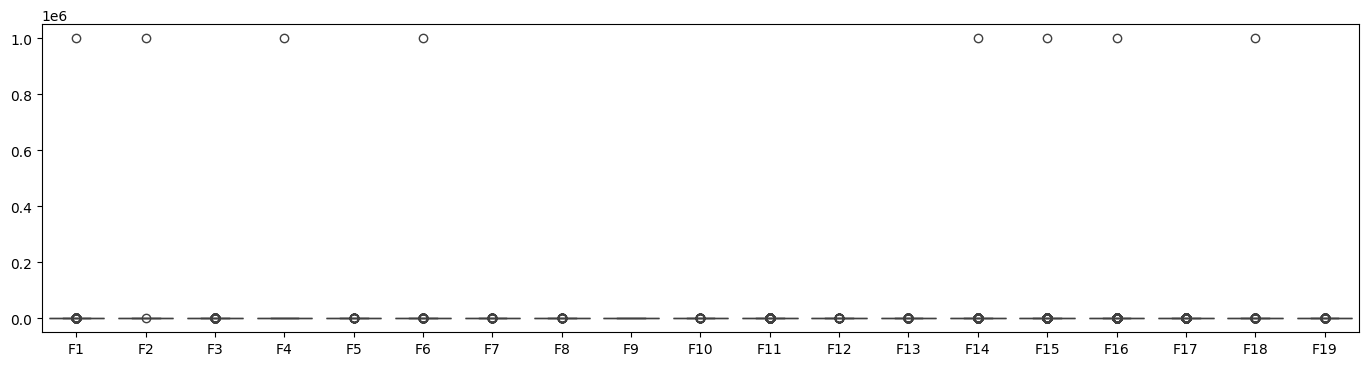

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using a boxplot
# sns.boxplot(x=imputed_data_df[['F1','F2']])
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 1:20])
plt.show()

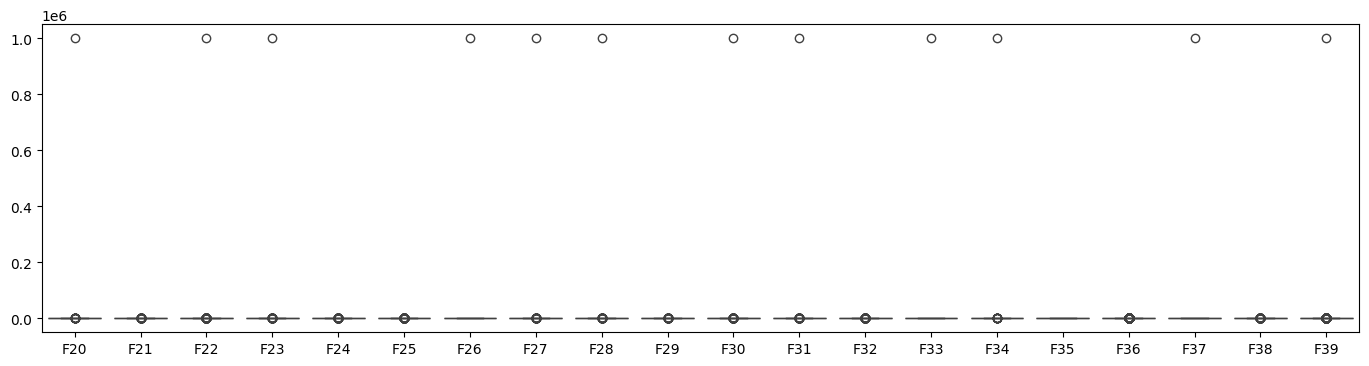

In [52]:
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 20:40])
plt.show()

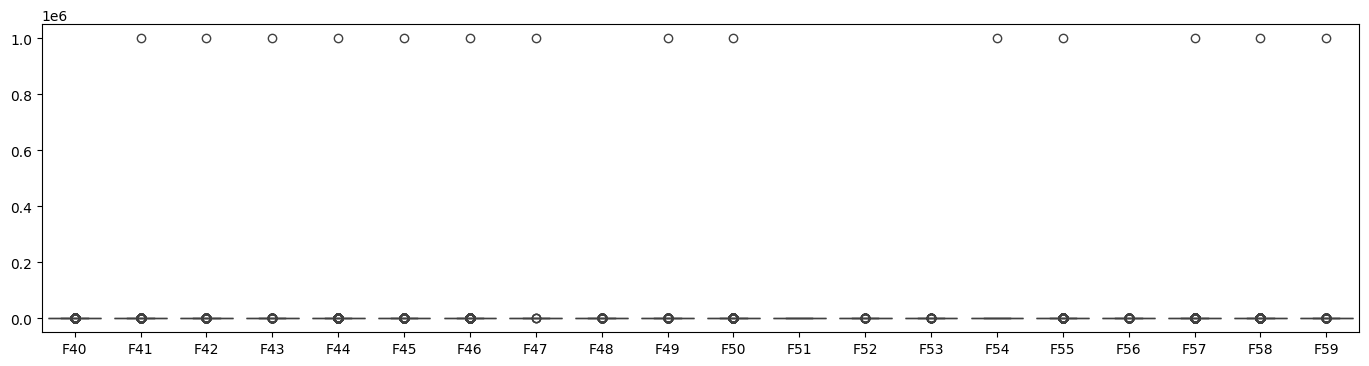

In [54]:
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 40:60])
plt.show()

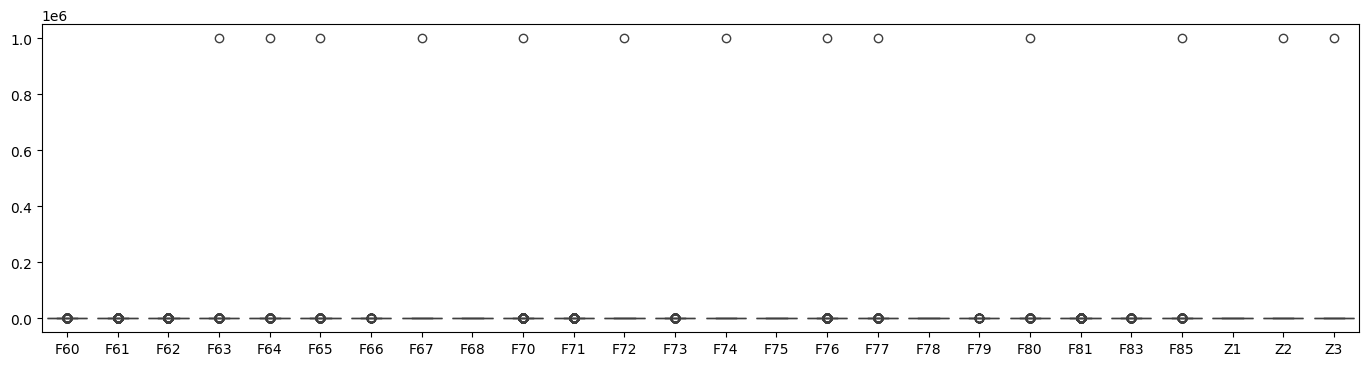

In [55]:
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=imputed_data_df.iloc[:, 60:])
plt.show()

From the above boxplots we can see there are outlieres in some columns. lets take care of them.

In [59]:
#lets merge the data and labels
merged_df = imputed_data_df.merge(labels_df, on='Sample')

In [61]:
import numpy as np

# Select only the columns that should be checked for outliers
data_to_check = merged_df.iloc[:, 1:-1]

Q1 = data_to_check.quantile(0.25)
Q3 = data_to_check.quantile(0.75)
IQR = Q3 - Q1

# Cap every outlier on the lower side by the lower whisker
for col in data_to_check.columns:
    if ((data_to_check[col] < (Q1[col] - 1.5 * IQR[col])).any()):
        merged_df[col] = np.where(merged_df[col] < Q1[col] - 1.5 * IQR[col], Q1[col] - 1.5 * IQR[col], merged_df[col])

# Cap every outlier on the upper side by the upper whisker
for col in data_to_check.columns:
    if ((data_to_check[col] > (Q3[col] + 1.5 * IQR[col])).any()):
        merged_df[col] = np.where(merged_df[col] > Q3[col] + 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col], merged_df[col])

Outliers were handeled by capping the outliers at the lower and upper whiskers of the box plot. the following plot shows boxplots after dealing with outliers.

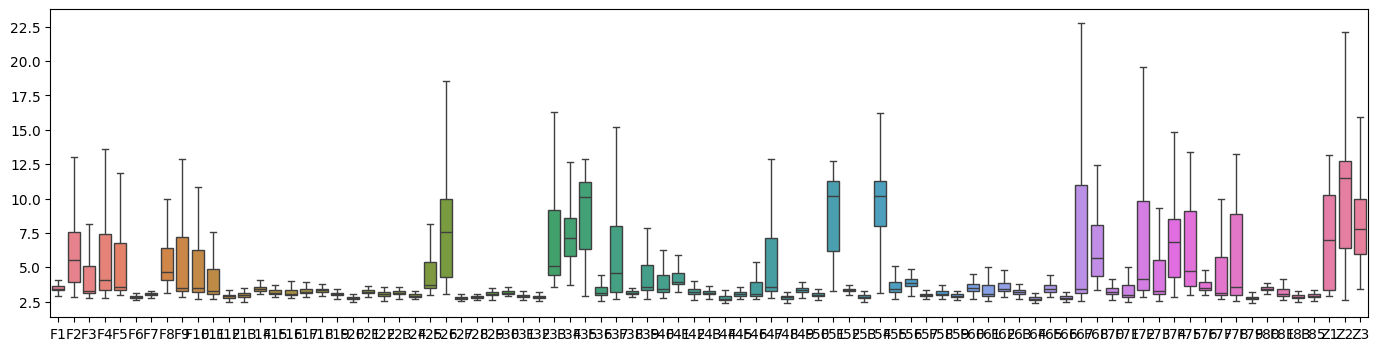

In [65]:
plt.figure(figsize=(17, 4))  # Adjust the size as necessary
sns.boxplot(data=merged_df.iloc[:, 1:-1])
plt.show()

now lets perform PCA to reduce the dimention of the dataset. Since PCA is sensitive to the scale of the data, it's essential to standardize the data so that each feature contributes equally to the analysis.

In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude the first and last columns from the PCA
# Assuming the first column is an identifier and the last column is the label
features_df = merged_df.iloc[:, 1:-1]

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)


ValueError: could not convert string to float: 'Group0'

In [ ]:
# Define the columns to check for non-numeric values
columns_to_check = data_df.columns[1:]

# Initialize a dictionary to store non-numeric values
non_numeric_values = {}

# Iterate over the specified columns
for col in columns_to_check:
    # Use pd.to_numeric with errors='coerce' to convert the column to numeric, coercing errors to NaN
    # Then, check for NaN values that indicate non-numeric entries
    non_numeric_mask = pd.to_numeric(data_df[col], errors='coerce').isna()
    
    # Extract non-numeric values
    if non_numeric_mask.any():
        # Filter out 'nan' values
        non_numeric_entries = data_df.loc[non_numeric_mask, col]
        non_numeric_entries = non_numeric_entries[non_numeric_entries != 'nan']
        
        if non_numeric_entries.any():
            non_numeric_values[col] = non_numeric_entries.unique()

# Print non-numeric values if found
if non_numeric_values:
    for col, values in non_numeric_values.items():
        print(f"Non-numeric values found in column '{col}': {values}")
else:
    print("No non-numeric values found in specified columns.")

Non-numeric values found in column 'F3': [nan '#value']
Non-numeric values found in column 'F5': [nan '#value']
Non-numeric values found in column 'F7': [nan '#value']
Non-numeric values found in column 'F8': [nan '#value']
Non-numeric values found in column 'F9': [nan '#value']
Non-numeric values found in column 'F10': [nan '#value']
Non-numeric values found in column 'F11': [nan '#value']
Non-numeric values found in column 'F12': [nan '#value']
Non-numeric values found in column 'F13': [nan '#value']
Non-numeric values found in column 'F17': [nan '#value']
Non-numeric values found in column 'F19': [nan '#value']
Non-numeric values found in column 'F21': [nan '#value']
Non-numeric values found in column 'F24': [nan '#value']
Non-numeric values found in column 'F25': [nan '#value']
Non-numeric values found in column 'F29': [nan '#value']
Non-numeric values found in column 'F32': [nan '#value']
Non-numeric values found in column 'F35': [nan '#value']
Non-numeric values found in column '